In [1]:
'''
Kaggle link: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data?select=data.csv


Research topic: Compare and contrast KNN Classifier and Naive Bayes Algorithms to classify tumor types into 
malignant and non-malignant based on feature analysis
'''
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline



In [2]:
data = pd.read_csv('/Users/sukanyade/Downloads/BreastCancerDataset.csv' )
#Getting the first few rows of data
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# dropping columns Id and Unnamed since they would not be needed for classification
data = data.drop(columns = ['id' , 'Unnamed: 32' ])


In [4]:
#Describe dataset:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
#For quantitative variables createnumerical summaries(mean, median, standard deviations etc)that are grouped by a categorical variable.
df_data_grp = data.groupby(['diagnosis'])
print(df_data_grp.describe())


          radius_mean                                                      \
                count       mean       std     min     25%     50%    75%   
diagnosis                                                                   
B               357.0  12.146524  1.780512   6.981  11.080  12.200  13.37   
M               212.0  17.462830  3.203971  10.950  15.075  17.325  19.59   

                 texture_mean             ... symmetry_worst          \
             max        count       mean  ...            75%     max   
diagnosis                                 ...                          
B          17.85        357.0  17.914762  ...       0.298300  0.4228   
M          28.11        212.0  21.604906  ...       0.359225  0.6638   

          fractal_dimension_worst                                         \
                            count      mean       std      min       25%   
diagnosis                                                                  
B                        

In [6]:
print(df_data_grp.std())
#Observation: The feature area_worst has the largest standard deviation

           radius_mean  texture_mean  perimeter_mean   area_mean  \
diagnosis                                                          
B             1.780512      3.995125       11.807438  134.287118   
M             3.203971      3.779470       21.854653  367.937978   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
B                 0.013446          0.033750        0.043442   
M                 0.012608          0.053987        0.075019   

           concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
diagnosis                                                              ...   
B                     0.015909       0.024807                0.006747  ...   
M                     0.034374       0.027638                0.007573  ...   

           radius_worst  texture_worst  perimeter_worst  area_worst  \
diagnosis                                                             
B              

In [7]:
#Convert Diagnosis into numerical value
data["diagnosis"] = data["diagnosis"].map({'M':1, 'B':0})
df_diagnosis = data.diagnosis



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

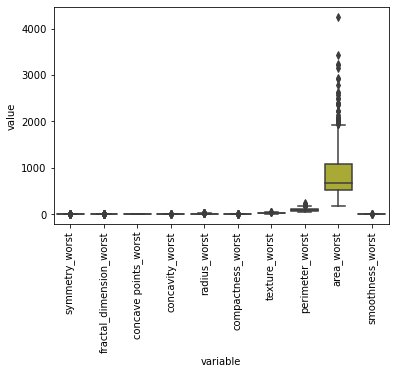

In [8]:
 
# Box plot of features:
df_features = data[[ 'symmetry_worst', 'fractal_dimension_worst' , 'concave points_worst' , 'concavity_worst', 'radius_worst'  , 'compactness_worst' , 'texture_worst',  'perimeter_worst',   'area_worst',  'smoothness_worst']]
sns.boxplot(x="variable", y="value", data=pd.melt(df_features))
plt.xticks(rotation=90)


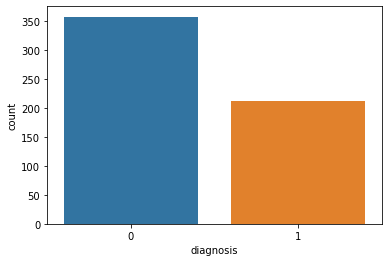

In [9]:
sns.countplot(data['diagnosis'],label="Sum")

plt.show()

In [10]:
#Normalization of data
df_features = df_features.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

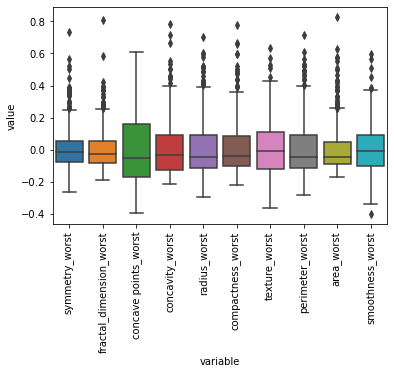

In [11]:
#Box plot of normalized data
sns.boxplot(x="variable", y="value", data=pd.melt(df_features))
plt.xticks(rotation=90)

In [12]:
# Splitting the dataset into malignant and benign.
dataMalignant=data[data['diagnosis'] ==1]
dataBenign=data[data['diagnosis'] ==0]
features_worst = ['symmetry_worst', 'fractal_dimension_worst' , 'concave points_worst' , 'concavity_worst', 'radius_worst'  , 'compactness_worst' , 'texture_worst',  'perimeter_worst',   'area_worst',  'smoothness_worst']



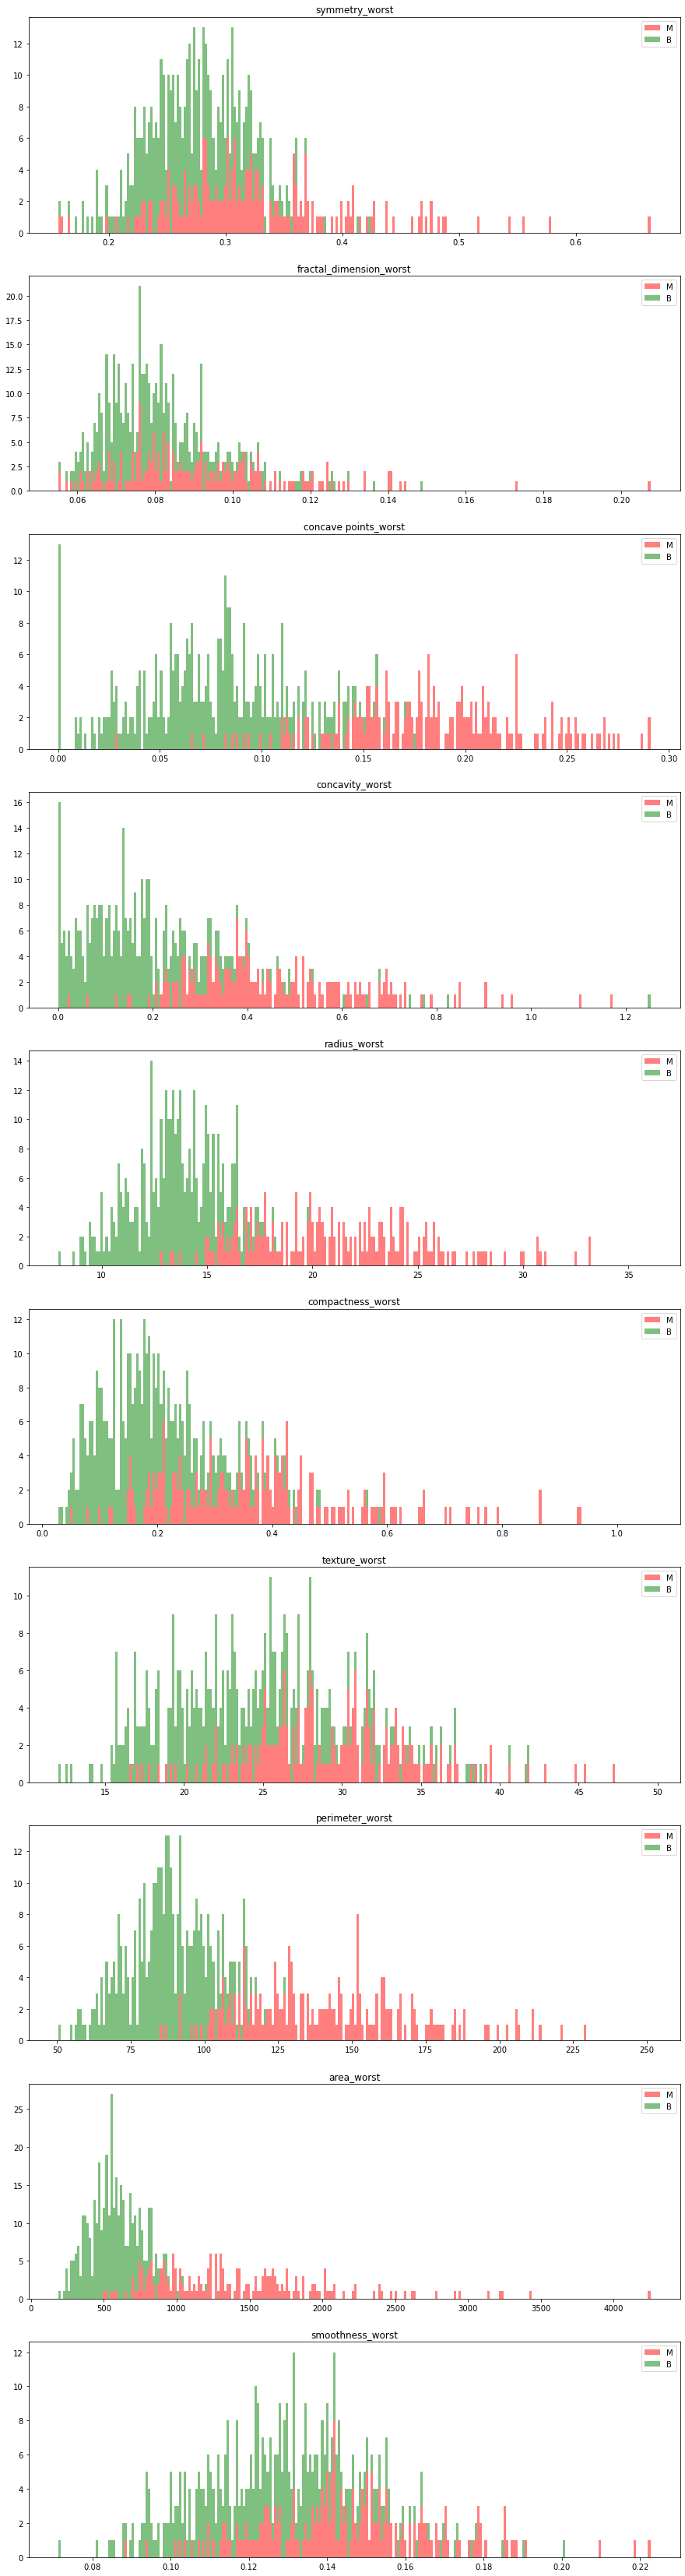

In [13]:
#Plotting these features as a histogram

fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(15,60))
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_worst[idx]]) - min(data[features_worst[idx]]))/250
    ax.hist([dataMalignant[features_worst[idx]],dataBenign[features_worst[idx]]], bins=np.arange(min(data[features_worst[idx]]), max(data[features_worst[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_worst[idx])
plt.show()
# The plots shows radius_worst, symmetry_worst,concavity_worst, concave point_worst, radius_worst, compactness_worst, perimeter worst has the most variation across Malignant and Benign types.
#Data looks mostly symmetrical except for concavity_worst and concave_points_worst

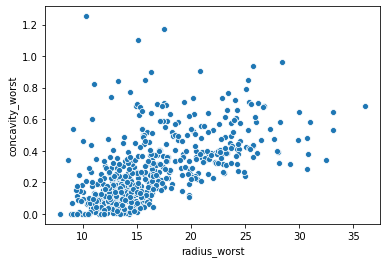

In [14]:
'''
Correlation and Regression:Amongst the quantitative variables generate Relationships and Associations. 
Identify two quantitative variables of interest that might be correlated
and then perform the following analysis:a
)Find the correlation coefficient between the explanatory and response variable
b)Create a scatter diagram and find  R squared 
c)Validate if the correlation is significant by conducting a Hypothesis test.
Provide your rationale and justify your findings regarding the correlation between two quantitative variables of interest.
Variables chosen: radius_worst and concavity_worst
'''
df_radius_con= data[['radius_worst', 'concavity_worst']]
sns.scatterplot(data=df_radius_con, x="radius_worst", y="concavity_worst")
plt.show()

In [17]:
# R-squared
correlation_matrix = np.corrcoef(df_radius_con['radius_worst'], df_radius_con['concavity_worst'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print('r squared: ', r_squared)
#Observation: There is a weak corelation between the two variables.

r squared:  0.3294469655376808


In [18]:
#Find corelation coefficient:
df_radius_con.corr()

,radius_worst,concavity_worst
radius_worst,1.000000,0.573975
concavity_worst,0.573975,1.000000


In [19]:

#Check for NAN and Infinite values
print(np.any(np.isnan(df_features)))


False


In [20]:
#KNN Classifier:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , precision_score , f1_score, recall_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(df_features, df_diagnosis, test_size=0.2, random_state=0)

knn = KNeighborsClassifier(n_neighbors=31).fit(X_train, y_train)



In [21]:
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test,y_pred)
knn_recall = recall_score(y_true=y_test, y_pred=y_pred)
knn_precision = precision_score(y_true=y_test, y_pred=y_pred)
print('Accuracy :', knn_accuracy)
print('Precision:number of true positives/number of false positives' , knn_precision)
print('Recall: number of true positives/ number of false negatives ' , knn_recall)



Accuracy : 0.9385964912280702
Precision:number of true positives/number of false positives 0.9545454545454546
Recall: number of true positives/ number of false negatives  0.8936170212765957


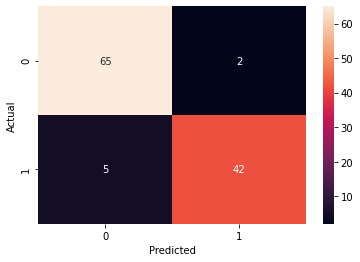

In [22]:
#Print confusion matrix
confmat = confusion_matrix(y_test,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [23]:
#Hyper parameter for KNN:
#Implementation of GridSearch
#P-> 1- manhattan_distance, 2-euliddean_distance, others - minkowski distance
grid = {'n_neighbors':np.arange(1,100),
        'p':np.arange(1,3),
        'weights':['uniform','distance'],
        'algorithm':['auto','ball_tree','kd_tree','brute']
       }
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,grid,cv=3)
knn_cv.fit(X_train,y_train)

print("Hyperparameters:",knn_cv.best_params_)
print("Train Score:",knn_cv.best_score_)
print('Best score: ' , knn_cv.best_score_)


Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 16, 'p': 1, 'weights': 'distance'}
Train Score: 0.9714621819449286
Best score:  0.9714621819449286


In [24]:
#Using results of Hyper parametarization for predicton
knn = KNeighborsClassifier(n_neighbors=8 , algorithm='auto',p=1, weights= 'distance').fit(X_train, y_train)

y_pred = knn.predict(X_test)
knn_opt_accuracy = accuracy_score(y_test,y_pred)
knn_opt_recall = recall_score(y_true=y_test, y_pred=y_pred)
knn_opt_precision = precision_score(y_true=y_test, y_pred=y_pred)
print('Accuracy :', knn_opt_accuracy)
print('Precision:number of true positives/number of false positives' , knn_opt_precision)
print('Recall: number of true positives/ number of false negatives ' , knn_opt_recall)



Accuracy : 0.9912280701754386
Precision:number of true positives/number of false positives 1.0
Recall: number of true positives/ number of false negatives  0.9787234042553191


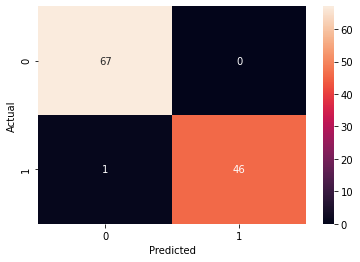

In [25]:
#Confusion matrix
confmat = confusion_matrix(y_test,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [26]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
scaler = StandardScaler()
scaler.fit(X_train)
# Data normalization  
from sklearn.preprocessing import StandardScaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, np.ravel(y_train))
y_pred = gnb.predict(X_test)

In [27]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)

[[63  4]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.92      0.94      0.93        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

93.85964912280701


In [28]:

nb_accuracy = accuracy_score(y_test,y_pred)
nb_recall = recall_score(y_test,y_pred)
nb_precision = precision_score(y_test,y_pred)
print("Accuracy:",nb_accuracy)
print ("Recall Score  : ", nb_recall)
print ("Precision Score: ",nb_precision)


Accuracy: 0.9385964912280702
Recall Score  :  0.9361702127659575
Precision Score:  0.9166666666666666


Text(0.5, 15.0, 'Predicted')

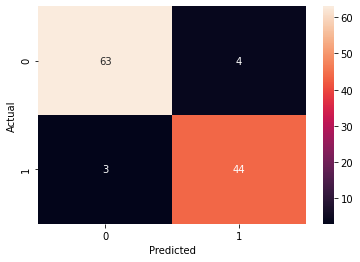

In [29]:
#Confusion matrix:

confmat = confusion_matrix(y_test,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')

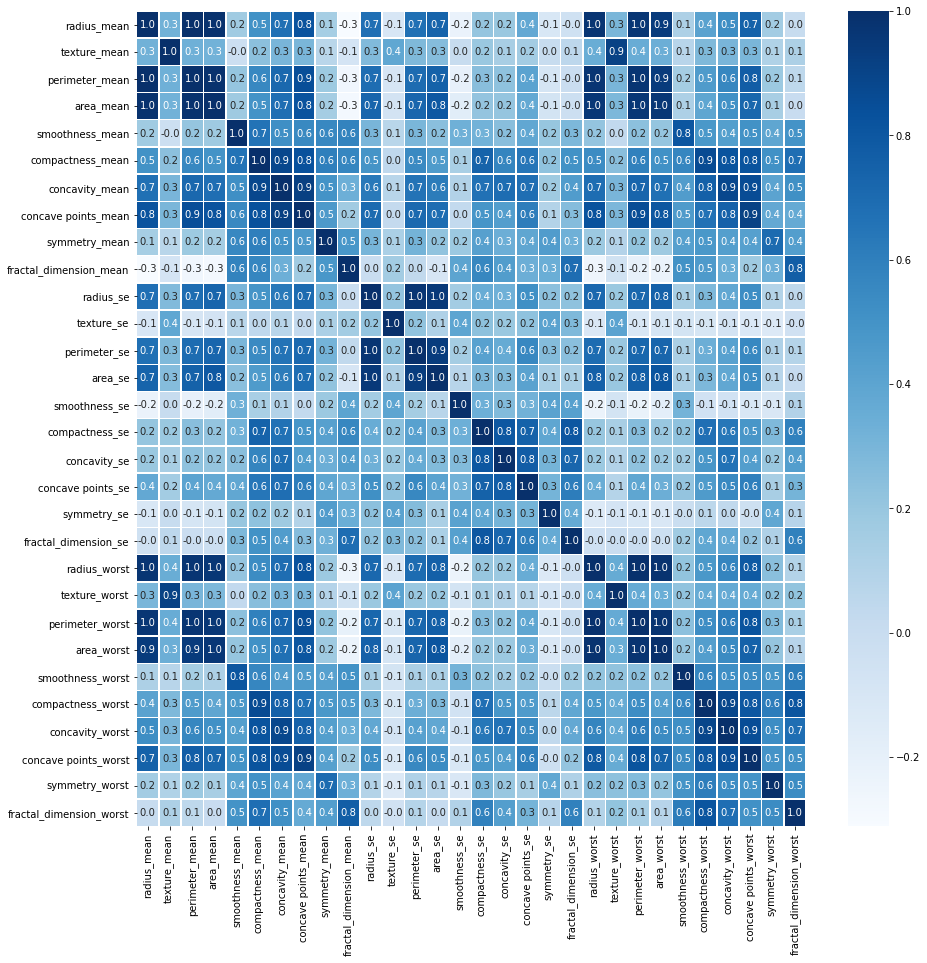

In [30]:
#Feature Selection using corelation coefficients:
plt.figure(figsize=(15,15))
data
y = data['diagnosis']
data.drop('diagnosis', axis=1, inplace=True)
sns.heatmap(data.corr(), cmap='Blues', annot=True,linewidths=.5, fmt= '.1f')
plt.show()


In [32]:
'''
Following features are highly corelated: radius mean- perimeter_mean, area_mean, radius_worst,perimeter worst, area_worst
so we can choose any one of them from the list
'''

'\nFollowing features are highly corelated: radius mean- perimeter_mean, area_mean, radius_worst,perimeter worst, area_worst\nso we can choose any one of them from the list\n'

In [33]:
#Algorithmic using Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
np.random.seed()
forest = RandomForestRegressor(n_estimators=400 , max_depth = 10)
fit = forest.fit(X_train,y_train)
accuracy = fit.score(X_test,y_test)
predict = fit.predict(X_test)
print("Prediction model accuracy:" , accuracy)

print("Prediction matrix: " , predict)


Prediction model accuracy: 0.8911031200381073
Prediction matrix:  [0.99   0.0675 0.     0.015  0.1925 0.     0.     0.     0.     0.
 0.1325 0.13   0.     0.62   0.21   0.8975 0.0075 1.     1.     0.9975
 0.9975 1.     0.02   0.     1.     0.     0.     0.95   0.     1.
 0.11   1.     0.045  0.9825 0.     0.99   0.     0.9875 0.0325 1.
 0.4325 0.     0.625  0.     0.4375 1.     0.     0.1075 0.     1.
 0.9775 0.91   0.985  0.     0.     0.     0.2425 0.0025 0.245  1.
 0.97   1.     0.     0.005  0.9975 0.2475 1.     1.     1.     0.005
 0.585  1.     0.     0.275  1.     0.     0.     0.     0.     0.
 0.93   1.     1.     0.0475 1.     0.     0.     0.     1.     1.
 0.     0.7575 0.565  0.9975 0.0175 0.     1.     0.275  0.     0.
 0.     0.     0.0625 0.425  1.     0.0925 1.     0.     0.7625 0.8625
 0.     1.     1.     0.145 ]


In [34]:
importances = list(zip(forest.feature_importances_, data.columns))
importances.sort(reverse=True)
print(importances)

[(0.4114413320300039, 'perimeter_mean'), (0.3197630869875782, 'concave points_mean'), (0.08508151617186074, 'smoothness_mean'), (0.059498021252334284, 'symmetry_mean'), (0.04590533249748082, 'concavity_mean'), (0.021474581515762273, 'area_mean'), (0.020425236964776272, 'fractal_dimension_mean'), (0.019373343774096708, 'radius_mean'), (0.009516195247869555, 'texture_mean'), (0.007521353558237263, 'compactness_mean')]


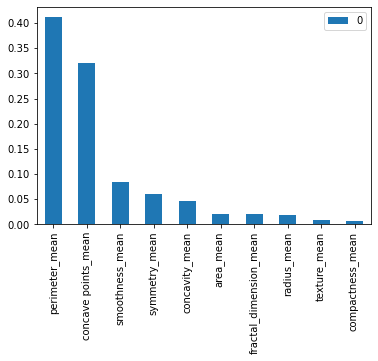

In [40]:
#Top 12 features:
pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'bar')

In [51]:
#Lasso Regression
from sklearn.linear_model import Lasso 
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(Lasso(alpha=0.015))
sel_.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.015))

In [52]:
selected_feat=X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('Selected features: {}'.format(len(selected_feat)))
print("Selected features:" , selected_feat)

total features: 12
Selected features: 3
Selected features: Index(['concave points_mean', 'radius_mean', 'texture_mean'], dtype='object')


In [43]:
#Using results of Lasso Regression for KNN
df_lasso_knn = data[['radius_worst' , 'concave points_worst',   'texture_worst']]
df_lasso_knn = df_lasso_knn.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
X_train, X_test, y_train, y_test = train_test_split(df_lasso_knn, df_diagnosis, test_size=0.2, random_state=0)
X_train, X_v, y_train, y_v = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

knn = KNeighborsClassifier(n_neighbors=8 , algorithm='auto',p=1, weights= 'distance').fit(X_train, y_train)



In [44]:
y_pred = knn.predict(X_v)
lasso_knn_opt_accuracy = accuracy_score(y_v,y_pred)
lasso_knn_opt_recall = recall_score(y_true=y_v, y_pred=y_pred)
lasso_knn_opt_precision = precision_score(y_true=y_v, y_pred=y_pred)
print('Accuracy :', lasso_knn_opt_accuracy)
print('Precision:number of true positives/number of false positives' , lasso_knn_opt_precision)
print('Recall: number of true positives/ number of false negatives ' , lasso_knn_opt_recall)



Accuracy : 0.978021978021978
Precision:number of true positives/number of false positives 1.0
Recall: number of true positives/ number of false negatives  0.9444444444444444


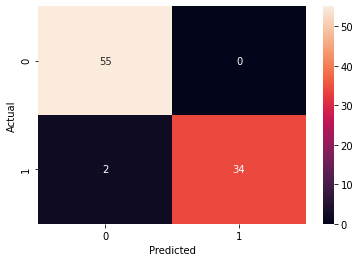

In [45]:
confmat = confusion_matrix(y_v,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [46]:
#Using results of Random Forest Regression for KNN

df_rf_knn = data[['concave points_mean',  'radius_se',  'area_mean',  'compactness_mean', 'texture_se', 'perimeter_mean',  'symmetry_mean',  'concavity_mean',  'radius_mean', 'smoothness_mean', 'texture_mean', 'fractal_dimension_mean']]
df_rf_knn = df_rf_knn.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
X_train, X_test, y_train, y_test = train_test_split(df_rf_knn, df_diagnosis, test_size=0.2, random_state=0)
X_train, X_v, y_train, y_v = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

knn = KNeighborsClassifier(n_neighbors=8 , algorithm='auto',p=1, weights= 'distance').fit(X_train, y_train)


In [47]:

y_pred = knn.predict(X_v)
rf_knn_opt_accuracy = accuracy_score(y_v,y_pred)
rf_knn_opt_recall = recall_score(y_true=y_v, y_pred=y_pred)
rf_knn_opt_precision = precision_score(y_true=y_v, y_pred=y_pred)
print('Accuracy :', rf_knn_opt_accuracy)
print('Precision:number of true positives/number of false positives' , rf_knn_opt_precision)
print('Recall: number of true positives/ number of false negatives ' , rf_knn_opt_recall)



Accuracy : 0.9560439560439561
Precision:number of true positives/number of false positives 0.9444444444444444
Recall: number of true positives/ number of false negatives  0.9444444444444444


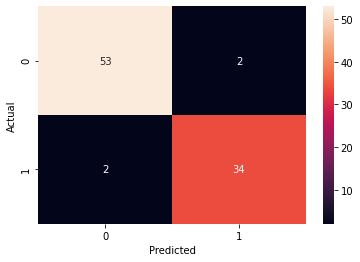

In [48]:
confmat = confusion_matrix(y_v,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [49]:
compare = pd.DataFrame(index=[ 'KNN_ini', 'KNN_opt', 'KNN_rf' , 'KNN_lasso','Naive Bayes'], 
                      columns=['Accuracy' , 'Recall',  'Precision'])
#Compare performance of both the algorithms
compare.at['Naive Bayes', :] = (nb_accuracy, nb_recall,nb_precision )
compare.at['KNN_ini', :] = (knn_accuracy, knn_recall,knn_precision )
compare.at['KNN_opt', :] = (knn_opt_accuracy, knn_opt_recall,knn_opt_precision )
compare.at['KNN_lasso', :] = (lasso_knn_opt_accuracy, lasso_knn_opt_recall,lasso_knn_opt_precision )
compare.at['KNN_rf', :] = (rf_knn_opt_accuracy, rf_knn_opt_recall,rf_knn_opt_precision )


In [50]:
compare

,Accuracy,Recall,Precision
KNN_ini,0.938596,0.893617,0.954545
KNN_opt,0.991228,0.978723,1
KNN_rf,0.956044,0.944444,0.944444
KNN_lasso,0.978022,0.944444,1
Naive Bayes,0.938596,0.93617,0.916667
